In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

#Imported all the libraries


In [2]:
df = pd.read_csv("german_credit.csv")
df.head()

#dataset is loaded

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


In [3]:
df.info()
df.describe()
df.isnull().sum()


#Getting the basic deatils from the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     175
Checking account    378
Credit amount         0
Duration              0
Purpose               0
Credit Risk           0
dtype: int64

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True) #Removing unassigned Data

le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# converted categorical data into numeric form


In [5]:
# Convert target labels to binary 

df["Credit Risk"] = df["Credit Risk"].map({1: 0, 2: 1})


In [6]:
X = df.drop("Credit Risk", axis=1)  
y = df["Credit Risk"]                # Target (0 = Good, 1 = Bad)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# spliting the data for training and testing


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Scaling the data

In [ ]:
lr = LogisticRegression()                  #Logistic Regression
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_prob = lr.predict_proba(X_test_scaled)[:,1]


In [ ]:
dt = DecisionTreeClassifier(random_state=42)       # Decision Tree
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:,1]


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)       # Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]


In [ ]:
def evaluate_model(name, y_test, y_pred, y_prob):               
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))

#  Evaluation Function by Evaluating all the models 

In [13]:
evaluate_model("Logistic Regression", y_test, lr_pred, lr_prob)
evaluate_model("Decision Tree", y_test, dt_pred, dt_prob)
evaluate_model("Random Forest", y_test, rf_pred, rf_prob)



Logistic Regression
Accuracy : 0.7539267015706806
Precision: 0.6904761904761905
Recall   : 0.4603174603174603
F1 Score : 0.5523809523809524
ROC AUC  : 0.7672371031746031

Decision Tree
Accuracy : 0.6701570680628273
Precision: 0.5
Recall   : 0.4126984126984127
F1 Score : 0.45217391304347826
ROC AUC  : 0.6047867063492063

Random Forest
Accuracy : 0.7172774869109948
Precision: 0.6285714285714286
Recall   : 0.3492063492063492
F1 Score : 0.4489795918367347
ROC AUC  : 0.7206721230158729


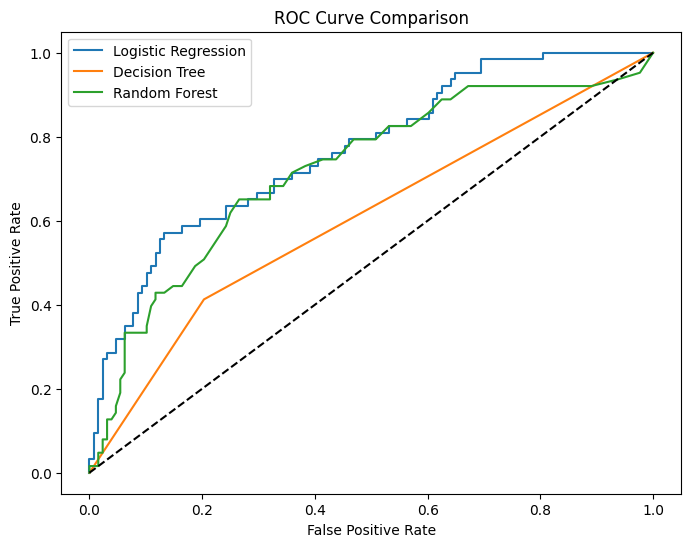

In [ ]:
plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# Checking graph which model performed well


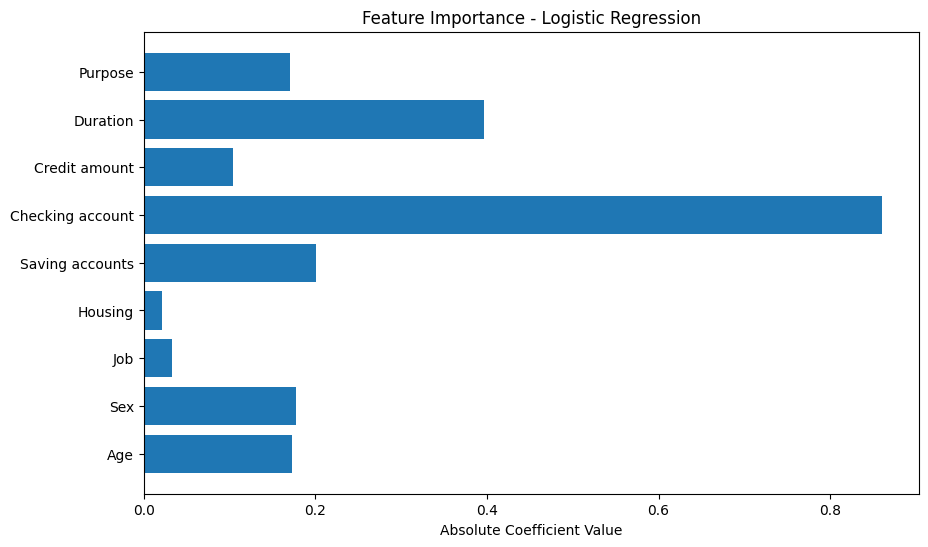

In [ ]:
# Returing the best model

importance = np.abs(lr.coef_[0])
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.show()


In [ ]:
# returns the probability and  worthy of the customer Risk

risk_prob = lr.predict_proba(X_test_scaled)
prob = risk_prob[0][1]
print("The Probability of Risk is",prob,"\n")
if prob >= 0.5:
    print("So the Customer is : Risky Customer")
else:
    print("So the Customer is : Creditworthy Customer")


The Probability of Risk is 0.30147479732157756 

So the Customer is : Creditworthy Customer
